<a href="https://colab.research.google.com/github/raha86/Decision_Tree_Classifier_Heart_disease_prediction/blob/main/Decision_Tree_Classifier_Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction - Decision Tree Classification**

## **About Dataset**

* ### **Attribute Information:**

1. age
2. sex
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: ECG ( Electrocardio graphy ) level at resting
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: How much ECG changes dusring exercise as compared to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: ( thalassemia ) A blood disorder that can damage your heart
14. target

In [125]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('/content/drive/MyDrive/ML Notebooks/Decision_Tree_Classifier_Heart_disease_prediction/heart_disease_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
df.shape

(303, 14)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [130]:
# checking for duplicates
df.duplicated().sum()

np.int64(1)

In [131]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [132]:
df['target'].value_counts(normalize=True) * 100

,proportion
target,
1,54.304636
0,45.695364


***The data is almost balanced***

In [133]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [134]:
target = 'target'
features = [col for col in df.columns if col != 'target']
print(features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [135]:
data = df[features]

**Showing distribution of data**

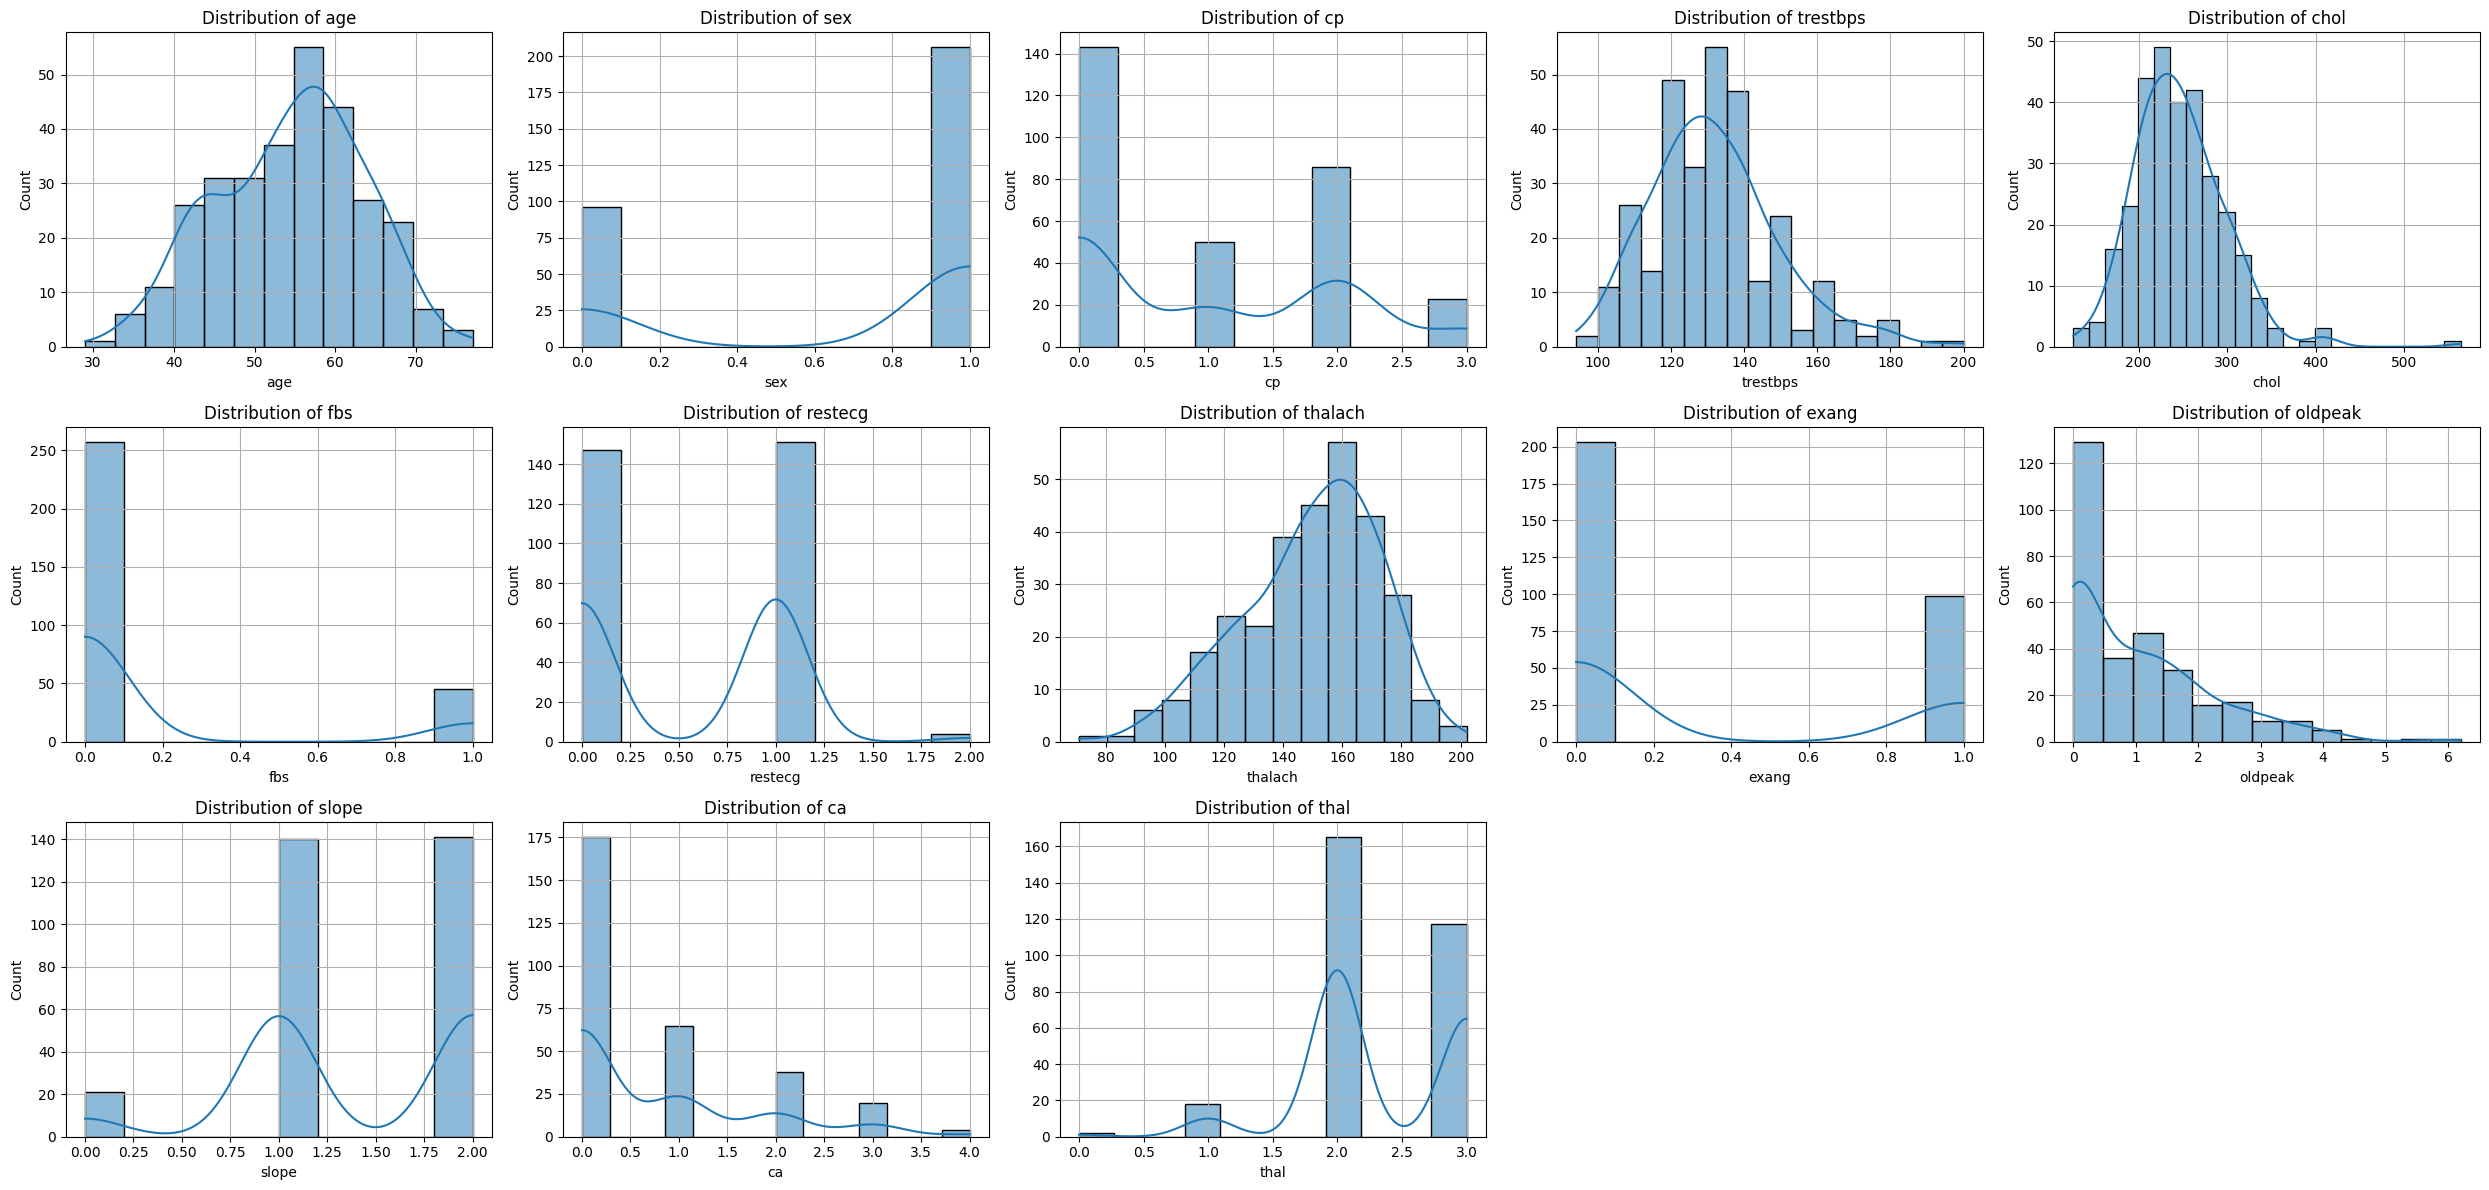

In [136]:
# Set number of plots per row
plots_per_row = 5
total_cols = len(data.columns)
rows = (total_cols + plots_per_row - 1) // plots_per_row  # calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(5 * plots_per_row, 4 * rows))

# Flatten axes array (even if only one row)
axes = axes.flatten()

# Loop through each column
for idx, column in enumerate(data.columns):
    sns.histplot(data=data, x=column, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].grid(True)

# Hide any unused plots (if number of columns isn't exactly divisible by 3)
for i in range(len(data.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Showing outlier**

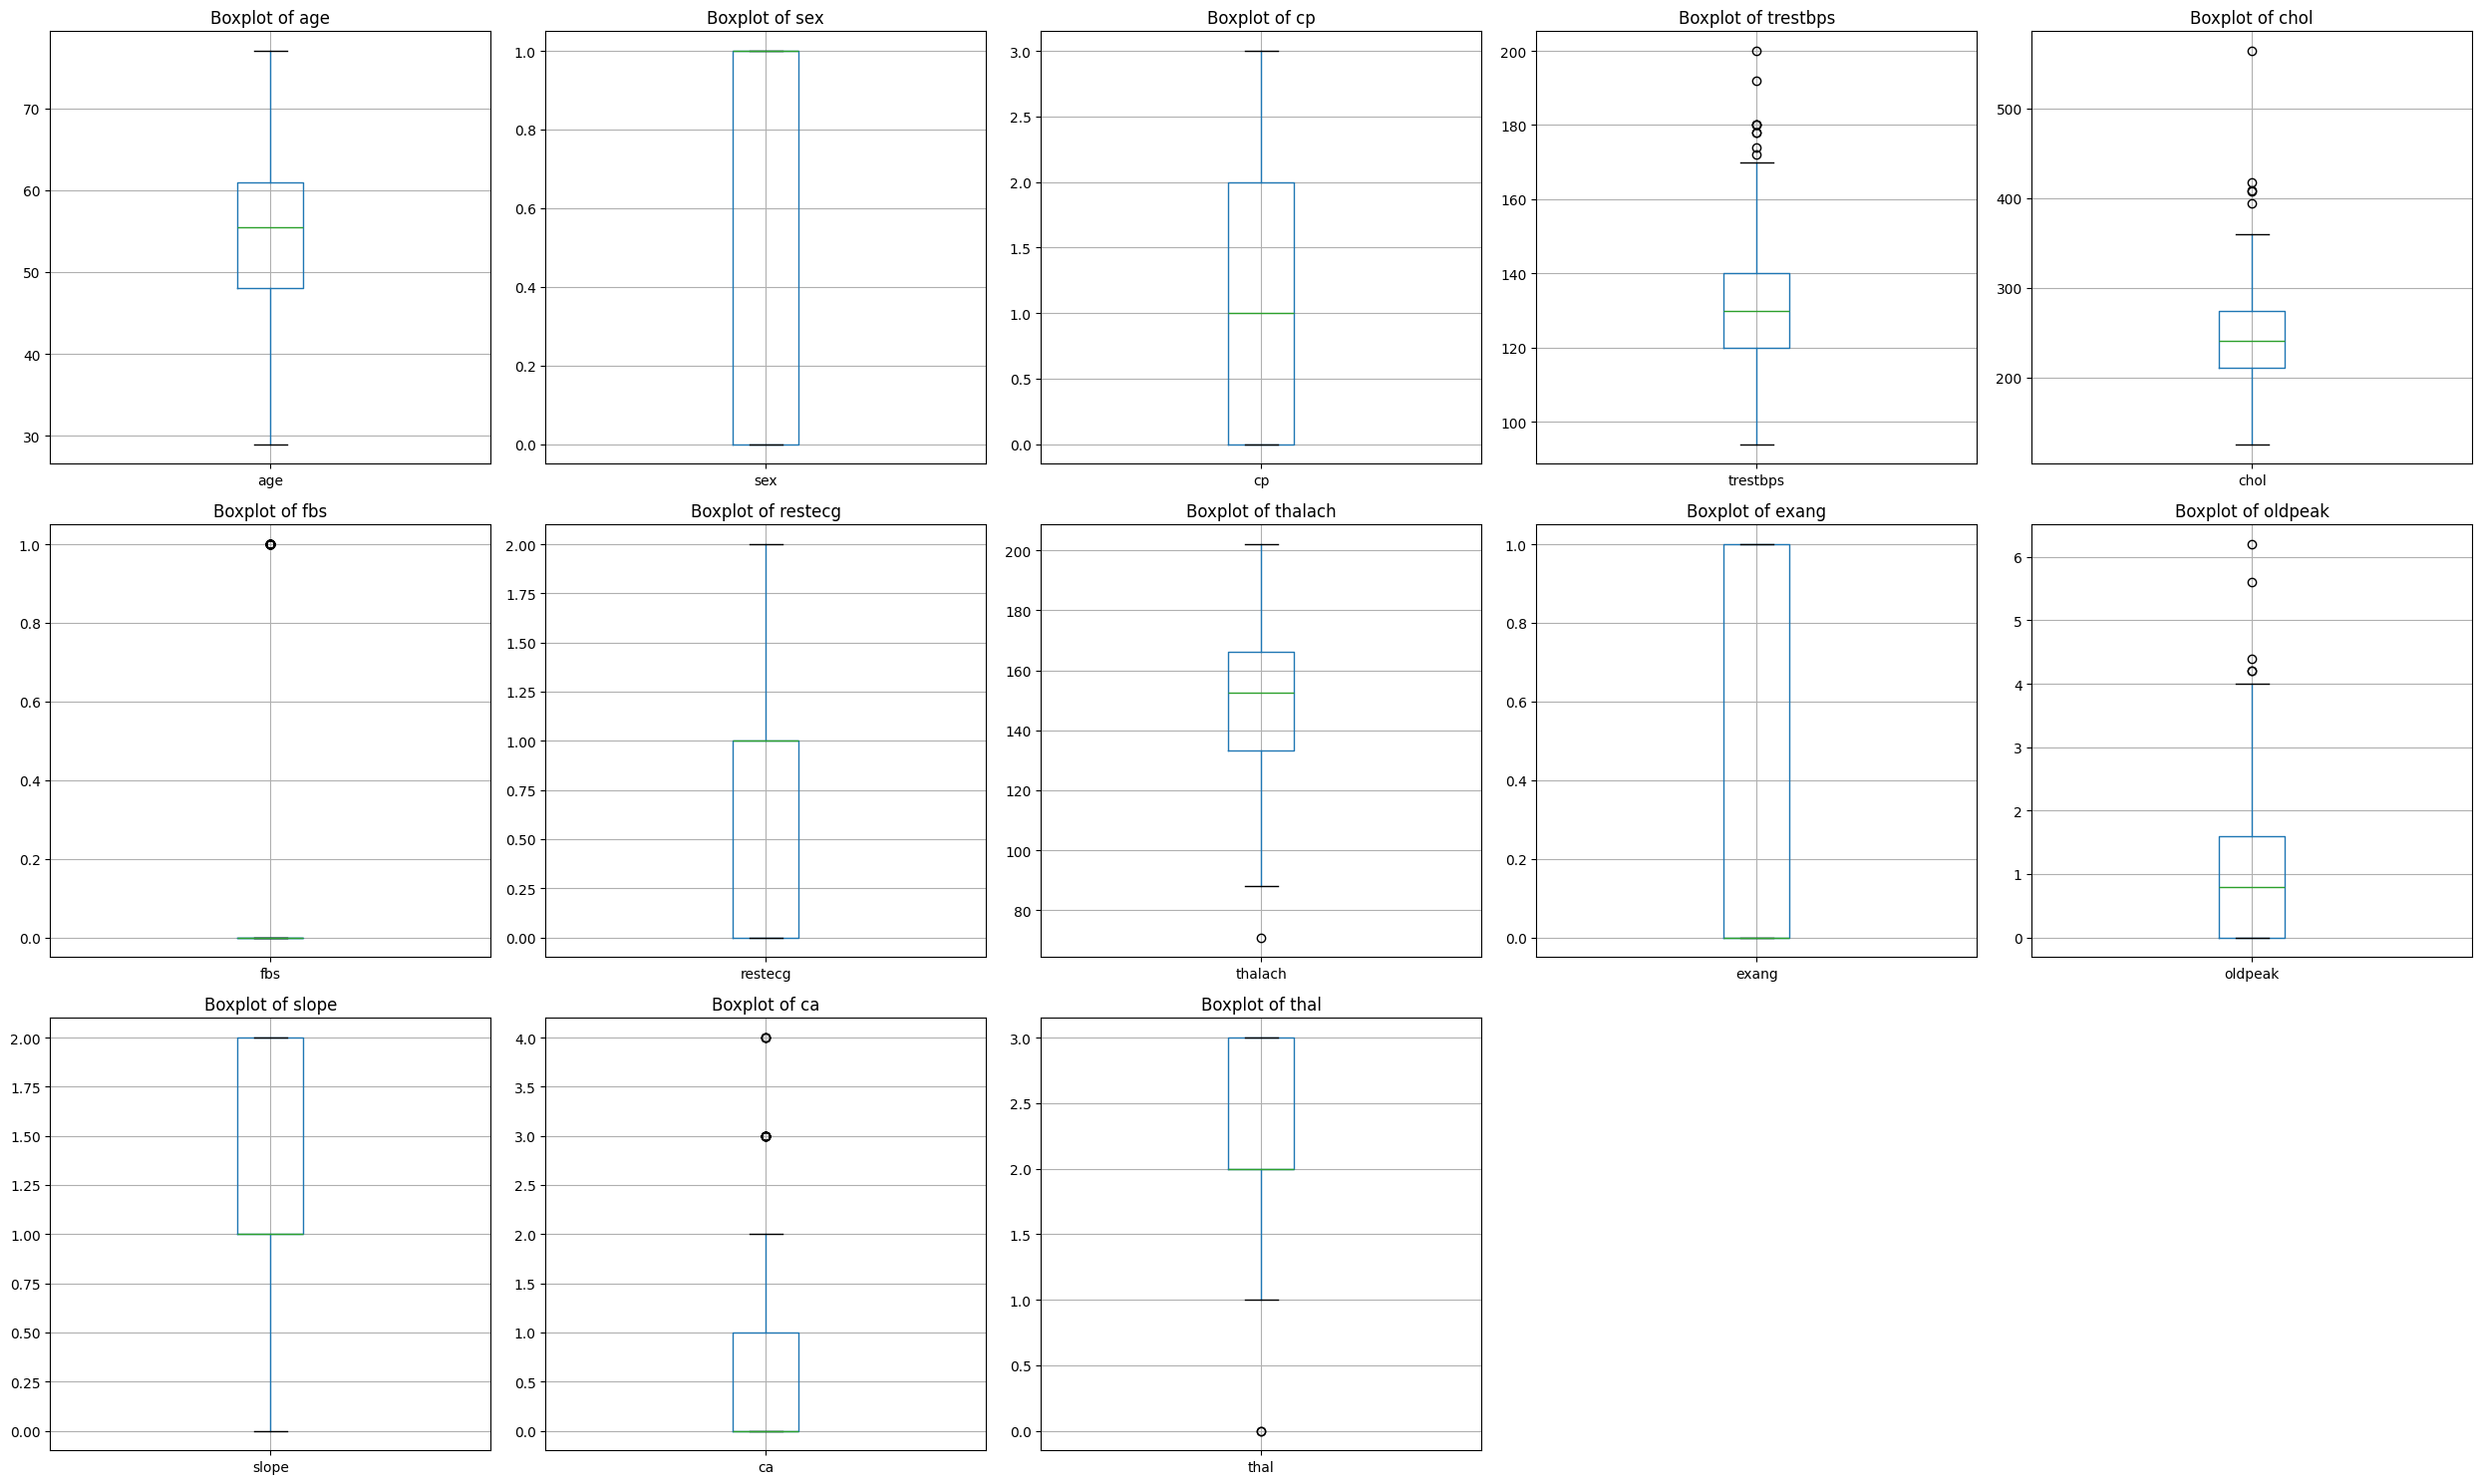

In [137]:
# Select only numerical columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Set up subplots
n_cols = 5  # number of plots per row (adjust as you like)
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's a 2D array

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Checking the correlation of independant variables with target variable**

<Axes: >

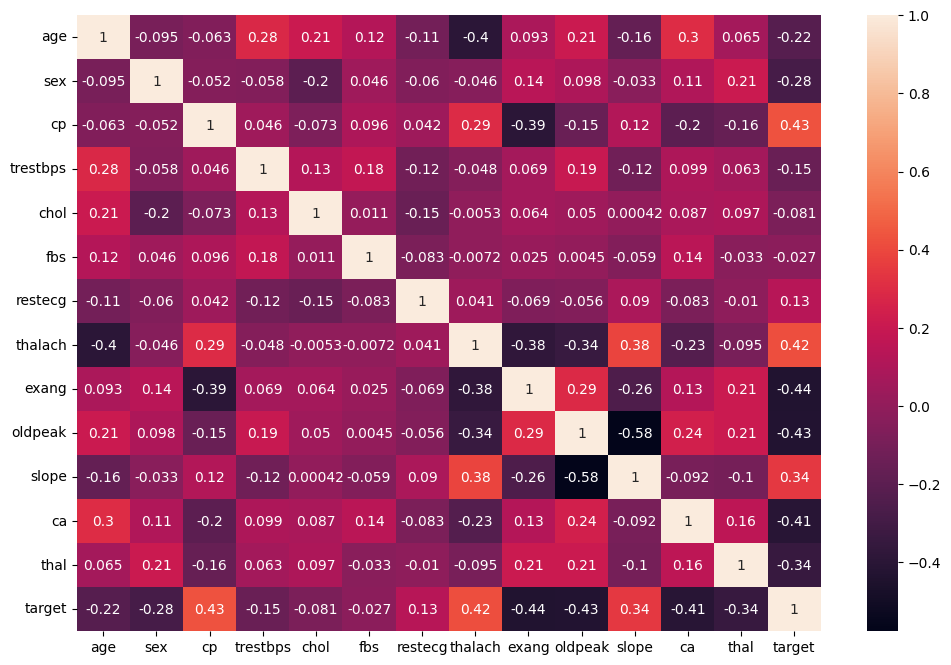

In [138]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

## **Model Building**

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [140]:
x_train, x_test, y_train, y_test = train_test_split(data, df[target], test_size=0.2, random_state=42, stratify = df[target])

In [141]:
dec_tree_cl = DecisionTreeClassifier(random_state=42)
dec_tree_cl.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

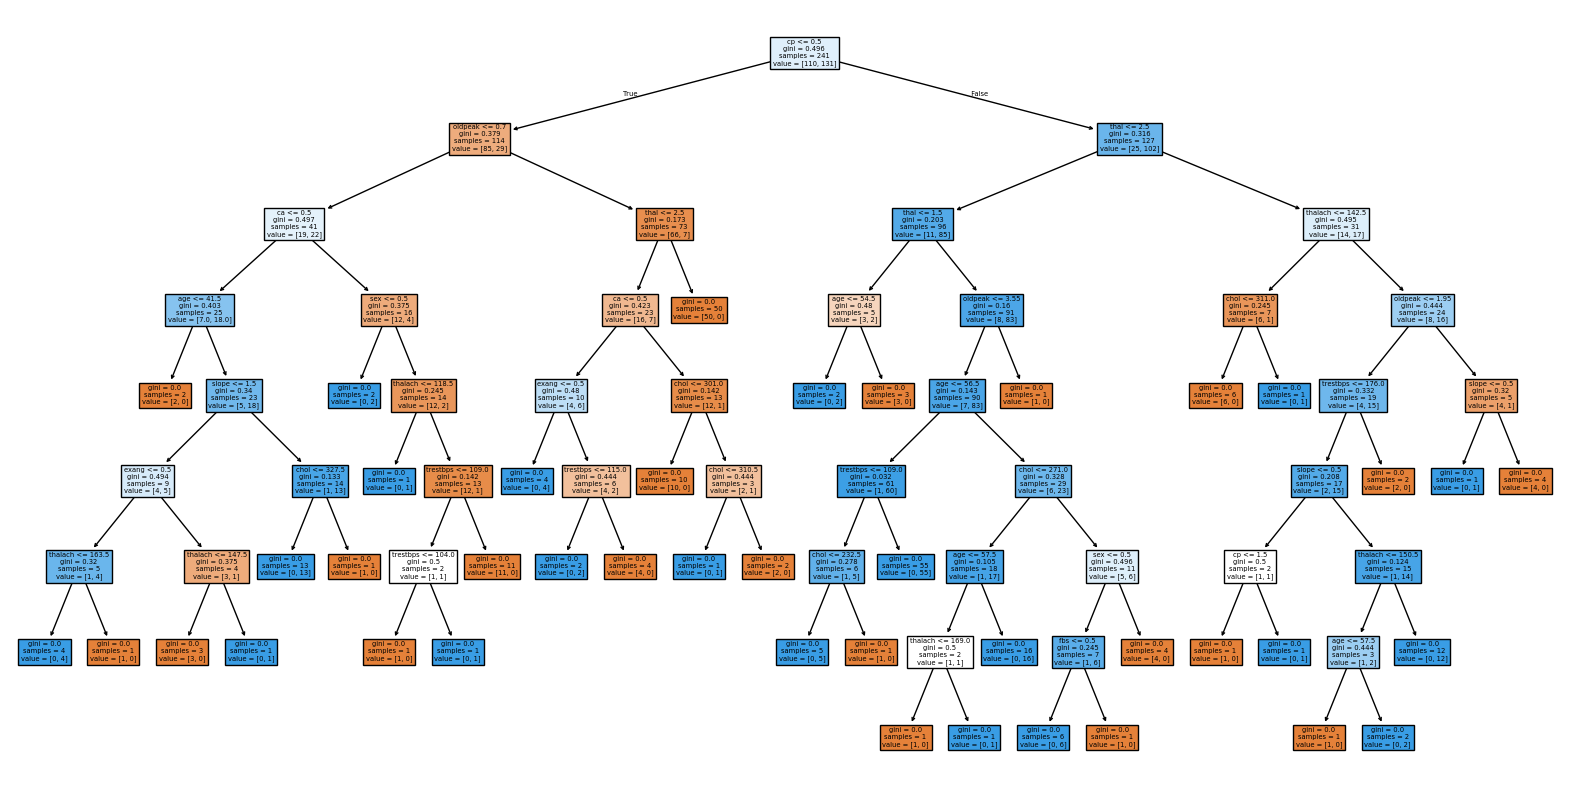

In [142]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dec_tree_cl, filled=True, feature_names=list(data.columns))
plt.show()

In [143]:
y_pred = dec_tree_cl.predict(x_test)

In [144]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

## **Performance Evaluation**

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [146]:
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score}')

Accuracy Score: 0.7213114754098361


In [147]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_mat}')

Confusion Matrix: 
[[17 11]
 [ 6 27]]


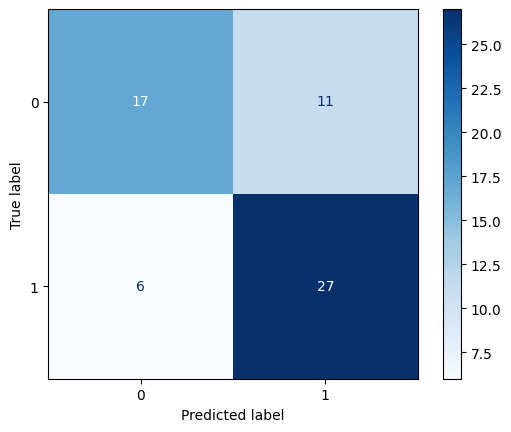

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='Blues')
plt.show()

## **Hyperparameter Tuning**

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [151]:
# Perform grid search
grid_search = GridSearchCV(estimator=dec_tree_cl, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [152]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [153]:
print(grid_search.best_params_)
print(f'best score: {grid_search.best_score_}')

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
best score: 0.7845238095238096


Best Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [154]:
dec_tree_tuned = grid_search.best_estimator_

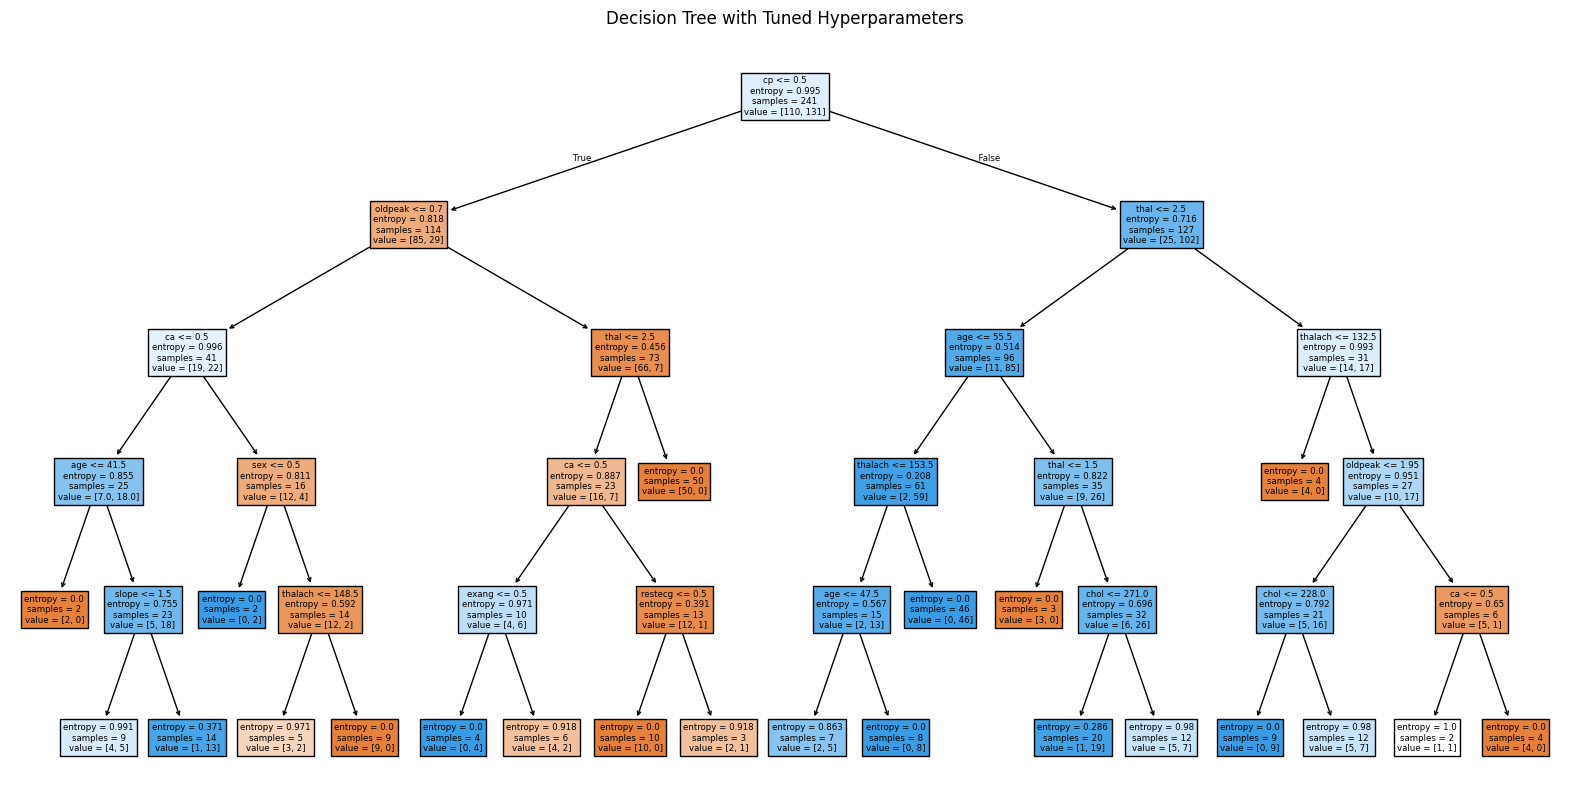

In [158]:
#plotting tuned decision tree
plt.figure(figsize=(20, 10))
plot_tree(dec_tree_tuned, filled=True, feature_names=list(data.columns))
plt.title('Decision Tree with Tuned Hyperparameters')
plt.show()

In [156]:
y_pred_tuned = dec_tree_tuned.predict(x_test)

### **Tuned model evaluation**

In [157]:
accuracy_score(y_test, y_pred_tuned)

0.8360655737704918